In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [2]:
# Read the dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


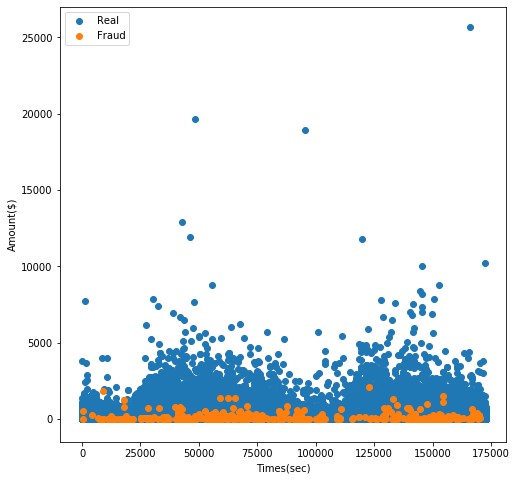

In [3]:
# Plot Time VS Amount
plt.figure(figsize=[8,8])
plt.scatter(data['Time'][data['Class']==0],data['Amount'][data['Class']==0])
plt.scatter(data['Time'][data['Class']==1],data['Amount'][data['Class']==1])
plt.xlabel('Times(sec)')
plt.ylabel('Amount($)')
plt.legend(['Real','Fraud'])

In [4]:
# Make a new column with seconds converted to hours
hours = data['Time'].apply(lambda x:x//3600)
data.insert(1,'Hours',hours)
data

,Time,Hours,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,47.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,47.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,47.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,47.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


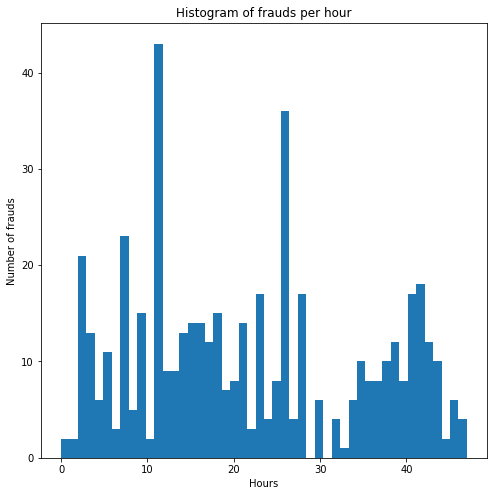

In [5]:
# Plot hour to see if any trend exists
frauds_hours = data['Hours'][data['Class']==1]
plt.figure(figsize=[8,8])
plt.title('Histogram of frauds per hour')
plt.hist(frauds_hours, bins=48)
plt.xlabel('Hours')
plt.ylabel('Number of frauds')
None

In [6]:
# Split the label and the features
x = data.iloc[:,2:-2].values
y = data['Class'].values

In [7]:
# Split to train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [8]:
# Scale to (0,1)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
# Train models, SVM, DecTree, NN, KNN
models = []
names = []
models.append(SVC(C=1.0, kernel='rbf'))
names.append("SVM")
models.append(DecisionTreeClassifier(criterion = 'gini'))
names.append("Decision Tree")
models.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
names.append("Neural Network") 
models.append(KNeighborsClassifier(n_neighbors=2))
names.append("KNN")             

for i in range(0,len(models)):
    print("Training: ", names[i])
    models[i].fit(x_train,y_train)

Training:  SVM


C:\Users\Hlias\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training:  Decision Tree
Training:  Neural Network
Training:  KNN


In [30]:
# Make prediction on test set
for i in range(0,len(models)):
    y_pred = models[i].predict(x_test)
    print("-------------------------------------------------------------------")
    print(f"Metrics of: {names[i]}")
    print(f"Test Accuracy: {metrics.accuracy_score(y_test,y_pred)}")
    print(f"Test Recall: {metrics.recall_score(y_test,y_pred)}")    
    print(f"Test Precision: {metrics.precision_score(y_test,y_pred)}")
    print(f"Test F1: {metrics.f1_score(y_test,y_pred)}")
    print(f"Test AUROC: {metrics.roc_auc_score(y_test,y_pred)}")
    print(f"Test Conf.Matrix:\n {metrics.confusion_matrix(y_test,y_pred)}")
    print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Metrics of: SVM
Test Accuracy: 0.9993153330290369
Test Recall: 0.6585365853658537
Test Precision: 0.8307692307692308
Test F1: 0.7346938775510204
Test AUROC: 0.829171597886865
Test Conf.Matrix:
 [[56869    11]
 [   28    54]]
-------------------------------------------------------------------
-------------------------------------------------------------------
Metrics of: Decision Tree
Test Accuracy: 0.9993504441557529
Test Recall: 0.8414634146341463
Test Precision: 0.7419354838709677
Test F1: 0.7885714285714285
Test AUROC: 0.920520736852938
Test Conf.Matrix:
 [[56856    24]
 [   13    69]]
-------------------------------------------------------------------
-------------------------------------------------------------------
Metrics of: Neural Network
Test Accuracy: 0.9995084442259752
Test Recall: 0.8536585365853658
Test Precision: 0.813953488372093
Test F1: 0.8333333333333333
Test AUROC: 0.9266886213165928
Test Conf.Matr

In [31]:
# Make prediction on training set to observe which model is overfitted
for i in range(0,len(models)):
    y_pred = models[i].predict(x_train)
    print("-------------------------------------------------------------------")
    print(f"Metrics of: {names[i]}")
    print(f"Train Accuracy: {metrics.accuracy_score(y_train,y_pred)}")
    print(f"Train Recall: {metrics.recall_score(y_train,y_pred)}")    
    print(f"Recall Precision: {metrics.precision_score(y_train,y_pred)}")
    print(f"Training F1: {metrics.f1_score(y_train,y_pred)}")
    print(f"Test AUROC: {metrics.roc_auc_score(y_train,y_pred)}")
    print(f"Training Conf.Matrix:\n {metrics.confusion_matrix(y_train,y_pred)}")
    print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Metrics of: SVM
Train Accuracy: 0.9990739318396278
Train Recall: 0.5609756097560976
Recall Precision: 0.8812260536398467
Training F1: 0.6855439642324889
Test AUROC: 0.7804196535381055
Training Conf.Matrix:
 [[227404     31]
 [   180    230]]
-------------------------------------------------------------------
-------------------------------------------------------------------
Metrics of: Decision Tree
Train Accuracy: 1.0
Train Recall: 1.0
Recall Precision: 1.0
Training F1: 1.0
Test AUROC: 1.0
Training Conf.Matrix:
 [[227435      0]
 [     0    410]]
-------------------------------------------------------------------
-------------------------------------------------------------------
Metrics of: Neural Network
Train Accuracy: 0.9993855471921701
Train Recall: 0.7804878048780488
Recall Precision: 0.8648648648648649
Training F1: 0.8205128205128206
Test AUROC: 0.8901339809229868
Training Conf.Matrix:
 [[227385     50]
 [    

In [32]:
# Choose the best model based on test recall, 
# because we want to minize frauds, False Possitives don't matter as much because 
# the client doesn't lose money
# Make predictions and visualizations the frauds only
best_model = models[2]
name = names[2]
x = data[data['Class']==1]
x = x.iloc[:,2:-2].values
x = scaler.transform(x)

y_pred = best_model.predict(x)

In [33]:
# Make some visualizations with only the frauds to see if there is any patter
# Make a new array with the frauds only and insert the predictions
x1 = data[data['Class']==1]
x1.insert(0,'pred',y_pred)
x1

,pred,Time,Hours,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,1,406.0,0.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,0,472.0,0.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,1,4462.0,1.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,1,6986.0,1.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,0,7519.0,2.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1,169142.0,46.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1,169347.0,47.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,0,169351.0,47.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,1,169966.0,47.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


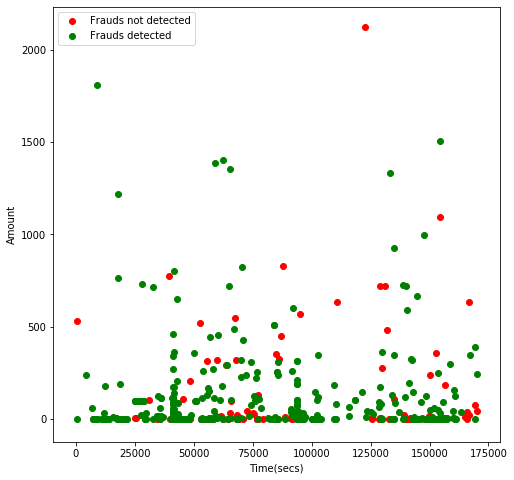

In [34]:
plt.figure(figsize=[8,8])
plt.scatter(x1['Time'][x1['pred']==0],x1['Amount'][x1['pred']==0],color='red',marker='o')
plt.scatter(x1['Time'][x1['pred']==1],x1['Amount'][x1['pred']==1],color='green',marker='o')
# plt.scatter(x1['Time'],x1['Amount'],color='orange',marker='.')
plt.xlabel('Time(secs)')
plt.ylabel('Amount')
plt.legend(['Frauds not detected','Frauds detected'])

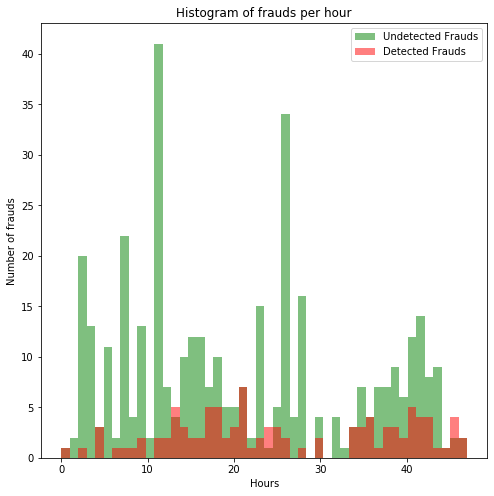

In [35]:
frauds_det = x1['Hours'][x1['pred']==1]
frauds_udet = x1['Hours'][x1['pred']==0]

plt.figure(figsize=[8,8])
plt.title('Histogram of frauds per hour')
plt.hist(frauds_det, bins=48, alpha=0.5,color='green')
plt.hist(frauds_udet, bins=48, alpha=0.5, color='red')
plt.legend(['Undetected Frauds','Detected Frauds'])
plt.xlabel('Hours')
plt.ylabel('Number of frauds')
None